# Mall Customer Segmentation

Problem Statement: to increase lifetime value by segmenting the customers into different groups with similar characteristics and form growth strategies for each group

### Analysis Process
1. Assesing data
2. pre-prosessing
3. choosing the right k and model
4. naming and plotting clustering results
5. analysing and forming growth stategies
6. possible growth strategies summary

### Data Wrangling


In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#support warnings from final output
import warnings
warnings.simplefilter("ignore")

#set up to view all the info of the colums
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#load data
df = pd.read_csv('Mall_Customers.csv')

### accessing data


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
def basic_info(df):
    print("this dataset has", df.shape[1], "columns and ", df.shape[0], "rows.")
    print("this dataset has ", df[df.duplicated()].shape[0], "duplicated rows.")
    print("  ")
    print("descriptive statistics of the numeric features in the dataset: ")
    print("  ")
    print(df.describe())
    print("  ")
    print("information about this dataset: ")
    print("  ")
    print(df.info())      
    
    

In [20]:
basic_info(df)

this dataset has 5 columns and  200 rows.
this dataset has  0 duplicated rows.
  
descriptive statistics of the numeric features in the dataset: 
  
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
  
information about this dataset: 
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Coun

In [25]:
#remove customer ID
df.drop(['CustomerID'], axis =1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [23]:
#Encode gender, male =1 female =0

#import label encoder
from sklearn import preprocessing

#creating label encoder
le = preprocessing.LabelEncoder()

#converting string labels into numbers
df.Gender = le.fit_transform(df.Gender)


In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


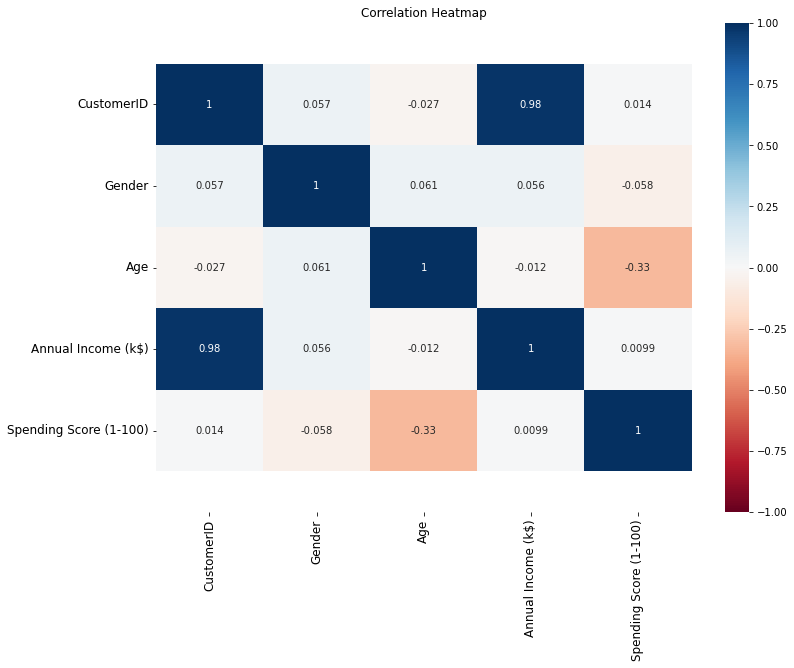

In [26]:
plt.figure(figsize = (12,9))
s = sb.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, center=0)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top =-0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation.png", bbox_inches='tight')
plt.show()